In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests


In [26]:
urlpre = "https://cuetracker.net/players/"
urlpost ="/century-frequency"
players = {"ronnie osullivan":"", "neil robertson":""}
for player in players:
    url = urlpre+player.replace(" ", "-")+urlpost
    soup = BeautifulSoup(requests.get(url).content, "lxml")
    players[player] = soup.find("table", {"class":"table table-striped"})

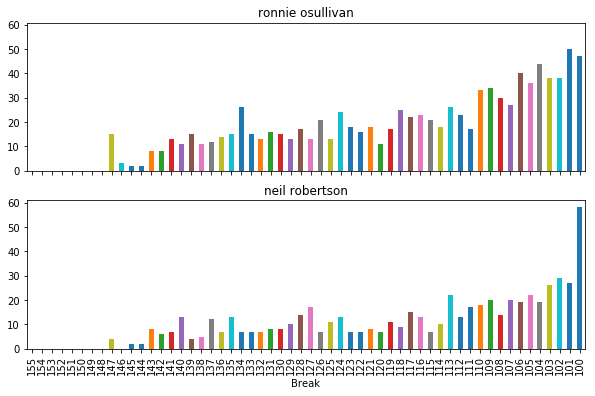

In [43]:
fig, ax = plt.subplots(len(players), 1, sharex=True, sharey=True, figsize=(10,3*len(players)))
row = 0
for player in players:
    df = pd.read_html(str(players[player]))
    df = df[0]
    df = df.set_index(['Break'])
    df['Frequency'].plot(kind='bar', ax=ax[row], title=player)
    row = row+1
plt.show()